<a href="https://colab.research.google.com/github/Leamich/Ragaik/blob/main/character_recognition/notebooks/train_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
from pathlib import Path
data_path = Path("/content/gdrive/MyDrive/ragaik")

In [3]:
!unzip  {data_path / "yolo_data.zip"}

Streaming output truncated to the last 5000 lines.
  inflating: yolo_data/train/004743.txt  
  inflating: yolo_data/train/009456.txt  
  inflating: yolo_data/train/002630.txt  
  inflating: yolo_data/train/001739.txt  
  inflating: yolo_data/train/004547.txt  
  inflating: yolo_data/train/007363.txt  
  inflating: yolo_data/train/001208.png  
  inflating: yolo_data/train/005374.txt  
  inflating: yolo_data/train/000481.png  
  inflating: yolo_data/train/005692.png  
  inflating: yolo_data/train/008449.txt  
  inflating: yolo_data/train/003379.txt  
  inflating: yolo_data/train/001485.png  
  inflating: yolo_data/train/008027.png  
  inflating: yolo_data/train/000365.png  
  inflating: yolo_data/train/003162.txt  
  inflating: yolo_data/train/003278.txt  
  inflating: yolo_data/train/002921.txt  
  inflating: yolo_data/train/003514.txt  
  inflating: yolo_data/train/002516.png  
  inflating: yolo_data/train/009265.txt  
  inflating: yolo_data/train/008252.txt  
  inflating: yolo_data/tr

In [4]:
data_path = Path("/content/yolo_data/")

In [5]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 45.1/112.6 GB disk)


In [6]:
import os
import shutil
from pathlib import Path

yolo_data_base = data_path.parent / "formatted_yolo_dataset"
yolo_data_base.mkdir(exist_ok=True)

(yolo_data_base / "images").mkdir(exist_ok=True)
(yolo_data_base / "labels").mkdir(exist_ok=True)

splits = ["train", "val", "test"]

for split in splits:
    split_images_dir = yolo_data_base / "images" / split
    split_labels_dir = yolo_data_base / "labels" / split

    split_images_dir.mkdir(exist_ok=True)
    split_labels_dir.mkdir(exist_ok=True)

    source_split_dir = data_path / split

    for file_path in source_split_dir.iterdir():
        if file_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
            shutil.copy(file_path, split_images_dir / file_path.name)

            label_file_name = file_path.with_suffix(".txt").name
            label_source_path = source_split_dir / label_file_name
            if label_source_path.exists():
                shutil.copy(label_source_path, split_labels_dir / label_file_name)

data_yaml_path = yolo_data_base / "data.yaml"

with open(data_yaml_path, "w") as f:
    f.write(f'''path: {yolo_data_base}
train: images/train
val: images/val
test: images/test

names:
    0: math
    1: text''')

print(f"YOLO dataset created at: {yolo_data_base}")

data_path = data_yaml_path

YOLO dataset created at: /content/formatted_yolo_dataset


In [7]:
!cat {data_yaml_path}

path: /content/formatted_yolo_dataset
train: images/train
val: images/val
test: images/test

names:
    0: math
    1: text

In [8]:
data_yaml_path.parent

PosixPath('/content/formatted_yolo_dataset')

In [9]:
txt = next(iter(data_yaml_path.parent.glob("*/*/*.txt")))
!tail { txt }

0.00000000 0.48333333 0.06851852 0.11041667 0.09074074
0.00000000 0.28385417 0.20185185 0.55833333 0.09814815
1.00000000 0.65911458 0.20185185 0.16822917 0.09814815
0.00000000 0.85260417 0.20231481 0.19270833 0.10092593
0.00000000 0.11848958 0.31018519 0.20156250 0.09814815
0.00000000 0.24687500 0.31064815 0.03541667 0.08611111
0.00000000 0.36458333 0.31064815 0.18541667 0.07500000
0.00000000 0.48697917 0.31064815 0.03645833 0.08611111
0.00000000 0.58203125 0.31018519 0.14010417 0.08888889
1.00000000 0.80364583 0.31064815 0.27083333 0.08981481


In [ ]:
# Load YOLO11n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11m.pt')  # load a pretrained YOLO detection model
model.train(data=data_yaml_path, epochs=6)  # train the model

100%|██████████| 38.8M/38.8M [00:00<00:00, 47.7MB/s]


Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/formatted_yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=6, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

train: Scanning /content/formatted_yolo_dataset/labels/train.cache... 9813 images, 3 backgrounds, 0 corrupt: 100%|██████████| 9813/9813 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.1±0.2 ms, read: 1317.2±1038.0 MB/s, size: 172.3 KB)


val: Scanning /content/formatted_yolo_dataset/labels/val.cache... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 6 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/6        10G     0.6501     0.8846     0.9382        474        640: 100%|██████████| 614/614 [06:54<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.87it/s]


                   all       1227      58655      0.619      0.749      0.749      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/6      9.97G     0.4838     0.6314     0.8562        523        640: 100%|██████████| 614/614 [06:43<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:21<00:00,  1.85it/s]


                   all       1227      58655      0.597      0.672       0.68       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/6      9.37G     0.4513      0.579     0.8438       1279        640:  25%|██▌       | 155/614 [01:41<05:31,  1.39it/s]


image 1/1 /content/MatAn-Sep11-06.png: 352x640 64 maths, 4 texts, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)


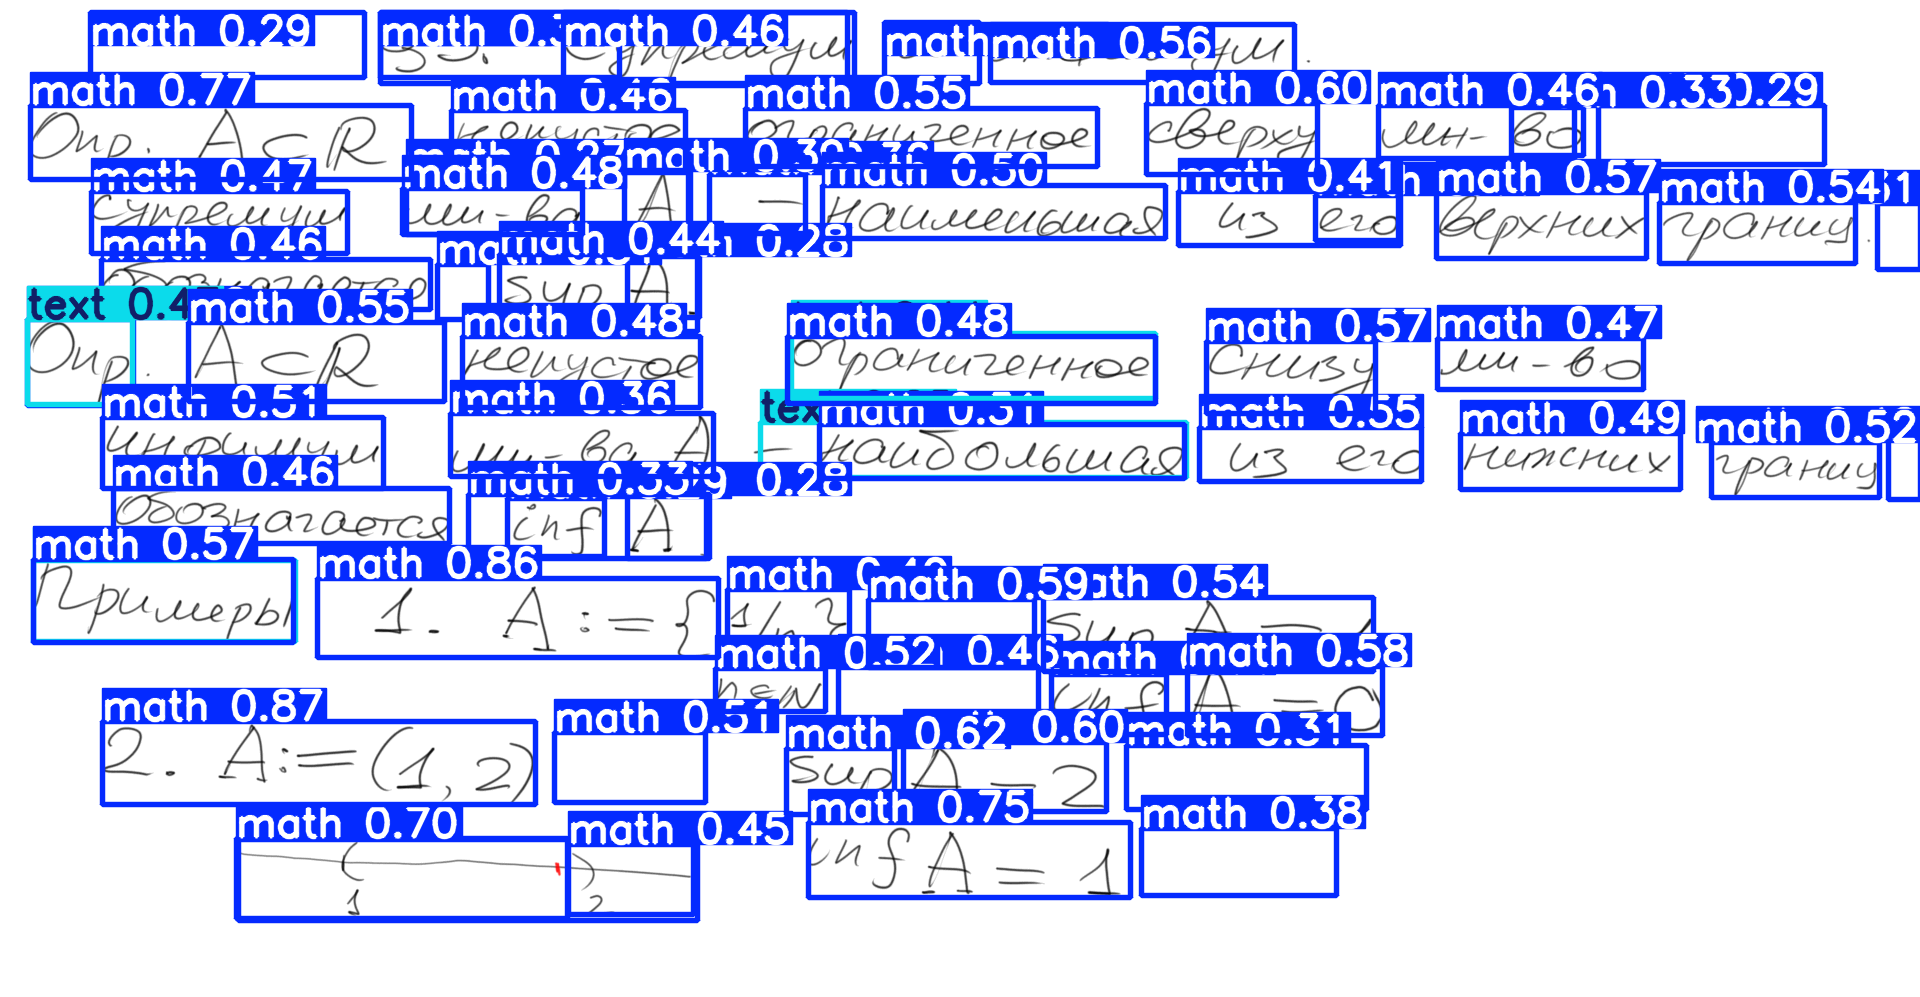

In [13]:
model("MatAn-Sep11-06.png")[0].show()

In [14]:
!du -sh /content/runs

41M	/content/runs


In [15]:
!mv /content/runs /content/gdrive/MyDrive/ragaik/yolo_runs